In [1]:
%matplotlib inline
from __future__ import division
import matplotlib
import numpy as np
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
import h5py
import os
import re
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4)})
plotStyles={"markersize":20,"markeredgewidth":3.0,"linewidth":3.0}
stepStyles={"markersize":20,"markeredgewidth":3.0,"linewidth":3.0,"where":"post"}
np.seterr(divide='ignore',invalid='ignore')
pass

In [30]:
# Load the random numbers.
filenames=("rng.txt","rng-avx.txt")
normRng=[]
expRng=[]
regex0 = re.compile("(\S+) (\S+)")
for filename in filenames:
    with open(filename) as f:
        n=[]
        e=[]
        for line in f:
            m = regex0.match(line)
            if m != None:
                n.append(float(m.group(1)))
                e.append(float(m.group(2)))
    normRng.append(n)
    expRng.append(e)
pass

### Check the uniform rngs.

Set 0 (rng.txt): min=0.0000002205  mean=0.4997222004 max=0.9999999000
Set 1 (rng-avx.txt): min=0.0000001870  mean=0.4999691503 max=1.0000000000


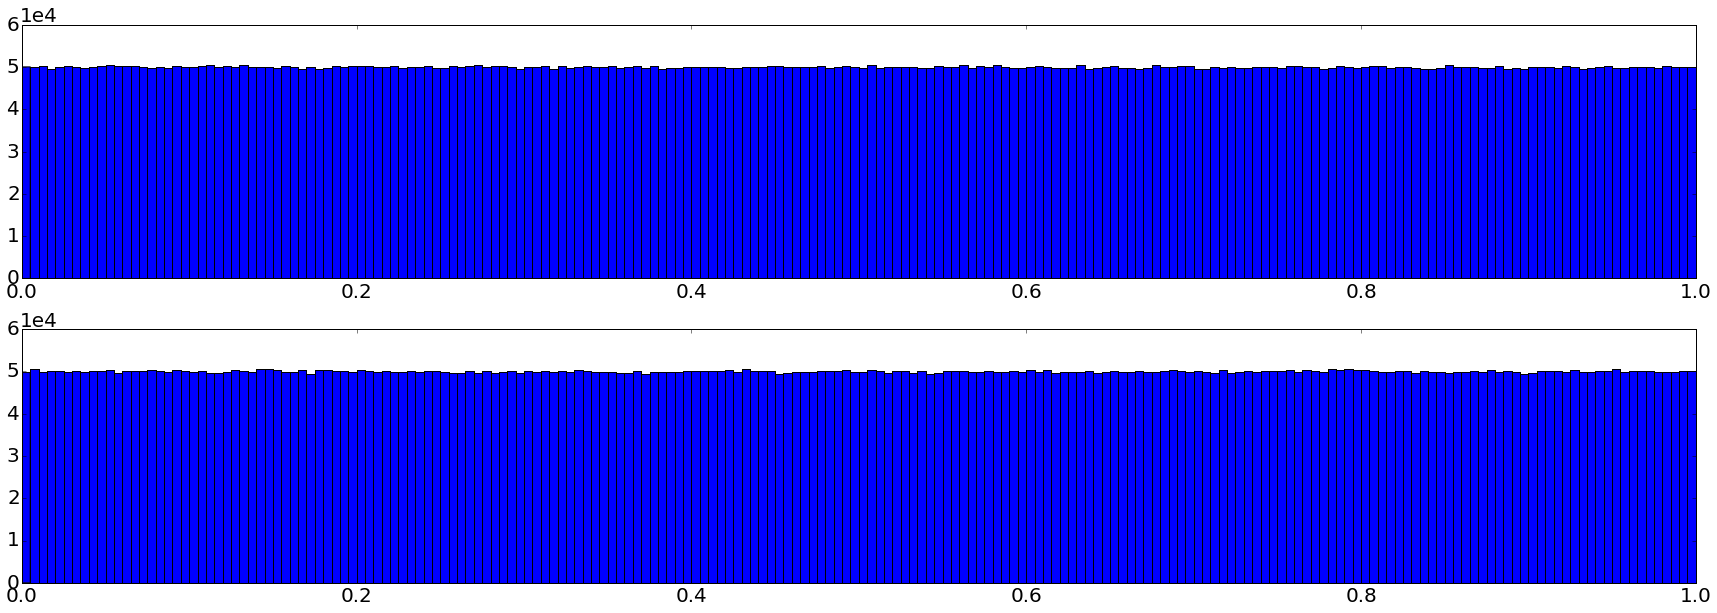

In [31]:
matplotlib.rcParams.update({'font.size': 20, "figure.figsize": (30,10)})
for i,filename in enumerate(filenames):
    print "Set %d (%s): min=%0.10f  mean=%0.10f max=%0.10f"%(i,filename,min(normRng[i]),mean(normRng[i]),max(normRng[i]))
    plt.subplot(len(filenames),1,i+1)
    plt.hist(normRng[i],200)

### Check the exponential rngs.

Set 0 (rng.txt): min=0.0000001462  mean=1.0002476989 max=16.1357000000
Set 1 (rng-avx.txt): min=0.0000000224  mean=1.0003795266 max=15.9288100000


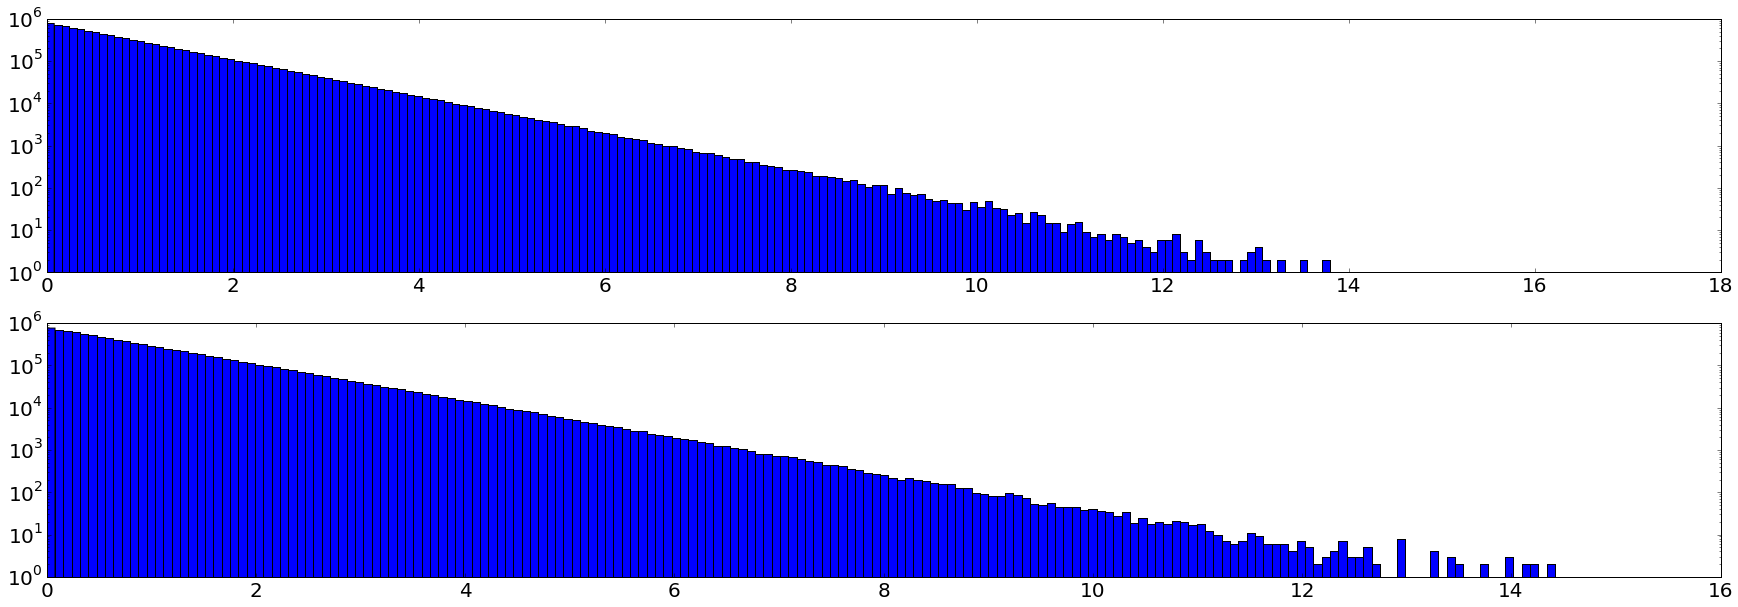

In [35]:
matplotlib.rcParams.update({'font.size': 20, "figure.figsize": (30,10)})
for i,filename in enumerate(filenames):
    print "Set %d (%s): min=%0.10f  mean=%0.10f max=%0.10f"%(i,filename,min(expRng[i]),mean(expRng[i]),max(expRng[i]))
    ax=plt.subplot(len(filenames),1,i+1)
    plt.hist(expRng[i],200)
    ax.set_yscale('log')